# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [2]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [3]:
#some measures of centrality for the crime statistics:
print("This is the mean for crime stats: "+str(round(df['crim'].mean(),2)))
print("This is the median for crime stats: "+str(round(df['crim'].median(),2)))
#There's a big difference between the median and the mean. Two big reasons why this might be so
#come to mind. 1) average is being skewed by a few (very) high-crime outliers and 
#2) the populations vary from one suburb to another, there's no indication these are the same size
# some of the higher crime suburbs might have a heavy weight in the overall per capita average (mean)
#while the the median is dominated by a bunch of smaller lower-crime areas


This is the mean for crime stats: 3.36
This is the median for crime stats: 0.26


In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

This is the mean for median house value by area: 22.77
this is the median for median house value: 21.6
Here's a box plot for median house value: 
as you can see, there are a quite a few outliers


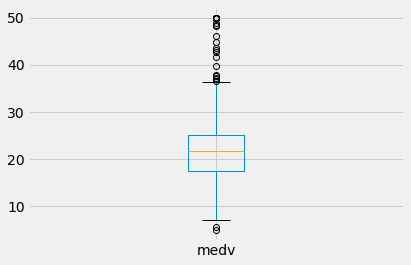

In [5]:
#Centrality and dispersion for house value
print("This is the mean for median house value by area: "+str(round(df['medv'].mean(),2)))
print('this is the median for median house value: '+str(round(df['medv'].median(),2)))
print("Here's a box plot for median house value: ")
df['medv'].plot(kind='box')
print('as you can see, there are a quite a few outliers')

the average median house value for areas along the river is: 30.18
the average median house value for areas not along the river is: 22.3
looks like people want to live on the river


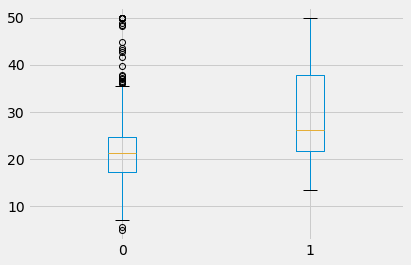

In [6]:
#using the charles river tag, let's see if house values are greater/less along the river
print('the average median house value for areas along the river is: '
      + str(round(df.loc[df['chas']==1,'medv'].mean(),2)))
print('the average median house value for areas not along the river is: '
      + str(round(df.loc[df['chas']==0,'medv'].mean(),2)))
print('looks like people want to live on the river')
on_river = df.loc[df['chas']==1,'medv']
off_river = df.loc[df['chas']==1,'medv']
#Here's a side by side box, showing that the median is indeed higher for the areas near the river
#though there a substantial outliers among the 
df_pivot = df.pivot(columns='chas')
df_pivot['medv'].plot(kind='box')

              dis         rad
count  333.000000  333.000000
mean     3.709934    9.633634
std      1.981123    8.742174
min      1.129600    1.000000
25%      2.122400    4.000000
50%      3.092300    5.000000
75%      5.116700   24.000000
max     10.710300   24.000000
AxesSubplot(0.08,0.07;0.87x0.81)


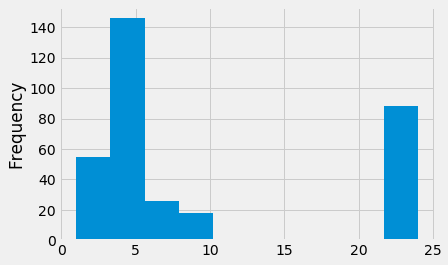

In [7]:
#I'm interested in the interplay of the 'dis' and 'rad variables on some of the other things here
print(df[['dis','rad']].describe())
#'dis' is a true average, with a bit of a skew towards to the higher distances 
#'rad' is an index from 1 - 24, the top quarter of the distribution is all the highest value, 24,
#let's see what the rad distribution looks like
print(df['rad'].plot(kind = 'hist'))
#There's a big gap between 10 and 24! I don't know how the index was designed, probably best to group this
#into high/low values?
df['rad_flag']=df['rad'].apply(lambda x: 'Access' if x == 24 else 'No Access')
#For the purposes of simple data vis, I'll do the same with 'dis', splitting it into two groups
df['dis_flag'] = df['dis'].apply(lambda x: 'Far' if x<4 else 'Near')
#now I can look at some of the other variables through the lenses of dis and rad


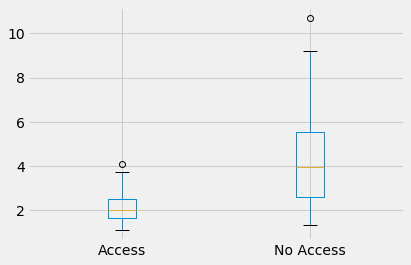

In [8]:
df_radgroup = df.groupby('rad_flag')
df_radgroup_pivot = df.pivot(columns = 'rad_flag')
df_radgroup_pivot['dis'].plot(kind = 'box')

rad_flag   dis_flag
Access     Far         17.002299
           Near        21.800000
No Access  Far         24.445600
           Near        25.210833
Name: medv, dtype: float64
dis_flag
Far     21.391038
Near    25.182645
Name: medv, dtype: float64


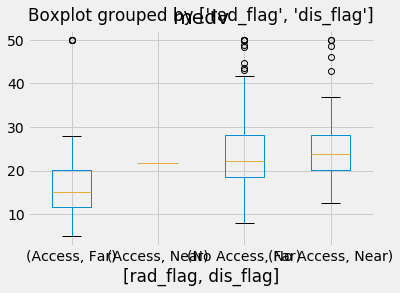

In [9]:
print(df.groupby(['rad_flag','dis_flag'])['medv'].mean())
print(df.groupby('dis_flag')['medv'].mean())

#somewhat contrary to my expectations, it appears that neighborhoods with access to the radial highways
#don't necessarily have higher house prices. It does appear that the neighborhoods near the employment
#centers do have higher house prices

df_disnear = df.drop(df[df.dis_flag == 'Far'].index)
df_disfar = df.drop(df[df.dis_flag == 'Near'].index)
df_disnear = df_disnear.pivot(columns = 'rad_flag')
df_disfar = df_disfar.pivot(columns = 'rad_flag')


df.boxplot(column=['medv'],by=['rad_flag','dis_flag'])
#How do I clean up these labels?

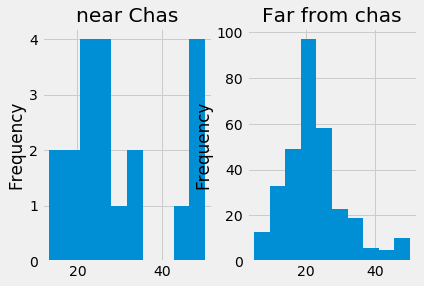

In [21]:
#Create a 2 new dataframes based on your existing data, where one contains all the properties next 
#to the Charles river, and the other one contains properties that aren't
df_nearchas = df.drop(df[df.chas == 0].index)
df_nearchas = df_nearchas.drop('chas',axis=1)
df_farchas = df.drop(df[df.chas == 1].index)
df_farchas = df_farchas.drop('chas',axis=1)

#df_farchas['medv'].plot(kind='hist')
fig, axes = plt.subplots(nrows=1, ncols=2)
df_farchas['medv'].plot(kind='hist', title = "Far from chas")
df_nearchas['medv'].plot(kind='hist', ax=axes[0], title = "near Chas")

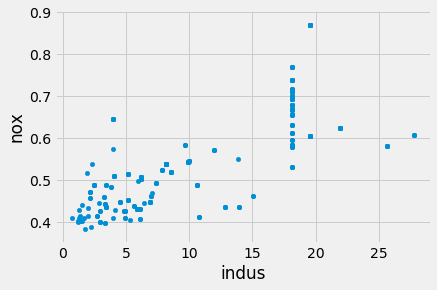

In [22]:
df.plot.scatter('indus','nox')
#not surprisingly, nitrogen oxide concentrations are higher in more industrial areas.

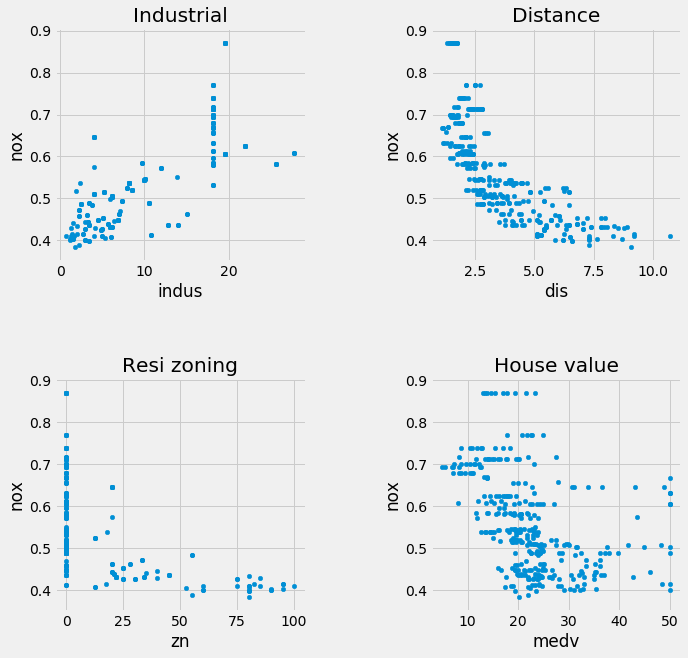

In [36]:
fig, axes = plt.subplots(figsize = (10,10), nrows = 2, ncols = 2)
fig.subplots_adjust(hspace = .5, wspace=.5)

df.plot.scatter('indus','nox', ax = axes[0,0], title = 'Industrial')
df.plot.scatter('zn','nox', ax = axes[1,0], title = 'Resi zoning')
df.plot.scatter('dis','nox', ax = axes[0,1], title = 'Distance')
df.plot.scatter('medv','nox', ax = axes[1,1], title = 'House value')